经常我们会在很多地方或者文件中看见 **频率谱** 和 **功率谱** 这两个名词，今天在这篇文章里，我们就来解释这两个经常听到的名词。

**频率谱/频率图**

> 频率谱是指将信号的频率成分分离出来后的图像，它可以用来描述信号的频率分布情况。

**功率谱/功率图**
> 功率谱是指将信号的功率分布情况分离出来后的图像，它可以用来描述信号的能量分布情况。

现在以OpenCV为例，分别介绍如何获得比如图片的频率和功率信息：

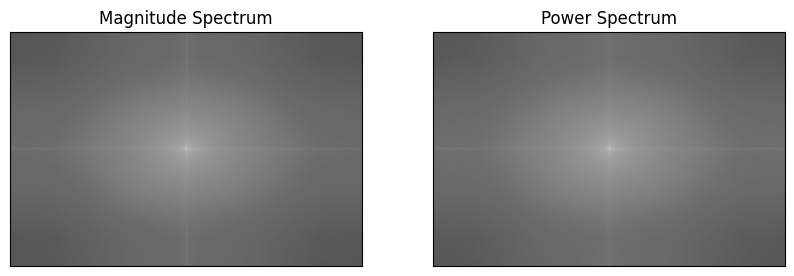

In [ ]:
# 导入所需的库
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读入图像
img = cv2.imread("/opt/images/castle.png")

# 检查图像是否成功加载
if img is None:
    raise FileNotFoundError("图像路径无效或图像文件不存在，请检查路径")

# 将图像转换为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 将灰度图转换为频域图像
f = np.fft.fft2(gray)

# 使用 np.fft.fftshift() 函数将低频部分移到图像中心
fshift = np.fft.fftshift(f)

# 获取图像的幅值谱（加1防止取log时的负无穷值）
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# 获取图像的功率谱，并使用对数变换增强显示效果
power_spectrum = np.log(np.abs(fshift) ** 2 + 1) # 本来是平方，但是为了显示效果，加1并取对数

# 使用 matplotlib 显示图像
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(power_spectrum, cmap='gray')
plt.title('Power Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

大致上来说，计算过程就是这样的。这是因为频率谱和功率谱之间的关系可以用以下方程表示[^1]：

$$
P(f)= \frac{\left|X(f) \right|^2}{2*R}
$$

[^1]: Oppenheim, A. V., and A. S. Willsky. "Signals and Systems." Prentice-Hall, Inc., Upper Saddle River, NJ, 1997

其中 P(f) 是功率谱，|X(f)| 是频率谱，R 是阻抗。假设阻抗等于1，那么就可以简单的得到**功率谱是频率谱的平方**。

在信号处理中，使用频率谱或功率谱取决于我们想要描述的信号特性。如果想要描述信号的频率分布情况，则使用频率谱；如果想要描述信号的能量分布情况，则使用功率谱。